<a href="https://colab.research.google.com/github/astrocrazy/Data-Challenges/blob/master/C_DataChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a data challenge notebook done as a part of the C interview process. The data set is from pinnacle betting books for the Baseball games in 2016.

###Import Functions

In [0]:
from google.colab import files

In [0]:
import pandas as pd
import numpy as np

In [0]:
import json
from pandas.io.json import json_normalize #package for flattening json in pandas df

In [0]:
import pandas_profiling as pp

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
from surebet import converter 

In [0]:
file = files.upload()

Saving MLB2016.json to MLB2016.json


In [0]:
df = pd.read_json('MLB2016.json',orient='column')

##EDA

In [0]:
df.head()

,GameID,EventDateTimeUTC,EventDateTimeET,AwayTeam,HomeTeam,DoubleHeaderGame,AwayStartingPitcher,HomeStartingPicher,FinalScoreAway,FinalScoreHome,Lines,HomeStartingPitcher
0,PIT201604030,1.459700e+09,1.459700e+09,St. Louis Cardinals,Pittsburgh Pirates,0,a wainwright,F LIRIANO,1,4,"{'EnteredDateTimeUTC': [1459400000.0, 14594000...",f liriano
1,TBA201604030,1.459700e+09,1.459700e+09,Toronto Blue Jays,Tampa Bay Rays,0,m stroman,C ARCHER,5,3,"{'EnteredDateTimeUTC': [1459400000.0, 14594000...",c archer
2,KCA201604030,1.459700e+09,1.459700e+09,New York Mets,Kansas City Royals,0,m harvey,E VOLQUEZ,3,4,"{'EnteredDateTimeUTC': [1459400000.0, 14594000...",e volquez
3,MIL201604040,1.459800e+09,1.459800e+09,San Francisco Giants,Milwaukee Brewers,0,m bumgarner,W PERALTA,12,3,"{'EnteredDateTimeUTC': [1459600000.0, 14596000...",w peralta
4,BAL201604040,1.459800e+09,1.459800e+09,Minnesota Twins,Baltimore Orioles,0,e santana,C TILLMAN,2,3,"{'EnteredDateTimeUTC': [1459600000.0, 14596000...",c tillman


In [0]:
type(df.Lines[0])

dict

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2462 entries, 0 to 2461
Data columns (total 12 columns):
GameID                 2462 non-null object
EventDateTimeUTC       2462 non-null float64
EventDateTimeET        2462 non-null float64
AwayTeam               2462 non-null object
HomeTeam               2462 non-null object
DoubleHeaderGame       2462 non-null int64
AwayStartingPitcher    2462 non-null object
HomeStartingPicher     2462 non-null object
FinalScoreAway         2462 non-null int64
FinalScoreHome         2462 non-null int64
Lines                  2462 non-null object
HomeStartingPitcher    2462 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 230.9+ KB


In [0]:
df.describe()

,EventDateTimeUTC,EventDateTimeET,DoubleHeaderGame,FinalScoreAway,FinalScoreHome
count,2.462000e+03,2.462000e+03,2462.000000,2462.000000,2462.000000
mean,1.467791e+09,1.467791e+09,0.017059,4.415922,4.517059
std,4.654121e+06,4.654121e+06,0.167787,3.104053,3.111812
min,1.459700e+09,1.459700e+09,0.000000,0.000000,0.000000
25%,1.463800e+09,1.463800e+09,0.000000,2.000000,2.000000
50%,1.467650e+09,1.467650e+09,0.000000,4.000000,4.000000
75%,1.471800e+09,1.471800e+09,0.000000,6.000000,6.000000
max,1.478100e+09,1.478100e+09,2.000000,21.000000,17.000000


In [0]:
#Do some profiling EDA
pfr = pp.ProfileReport(df)
pfr.to_file("Pinnacle_data.html")

Going to drop the Lines column since it is a dictionary by itself, which will be converted into a dataframe later.

In [0]:
lines_df = df["Lines"]

In [0]:
#convert the lines dictionary to a dataframe
df_lines = pd.DataFrame(df['Lines'].values.tolist(), index=df.index)

In [0]:
df_lines.shape

(2462, 10)

In [0]:
df_lines.head()

,EnteredDateTimeET,EnteredDateTimeUTC,MoneyUS1,MoneyUS2,SpreadTeam1,SpreadUS1,SpreadUS2,TotalPoints,TotalUSOver,TotalUSUnder
0,"[1459400000.0, 1459400000.0, 1459400000.0, 145...","[1459400000.0, 1459400000.0, 1459400000.0, 145...","[-110, -110, -110, -110, -110, -110, -107, -10...","[102, 102, 102, 102, 102, 102, -101, -101, -10...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5,...","[None, 100, 106, 107, 109, 102, 102, 109, 109,...","[None, -110, -117, -118, -120, -113, -113, -12..."
1,"[1459400000.0, 1459400000.0, 1459400000.0, 145...","[1459400000.0, 1459400000.0, 1459400000.0, 145...","[-113, -113, -113, -113, -113, -113, -110, -11...","[104, 104, 104, 104, 104, 104, 102, 103, 103, ...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[None, -110, -110, -104, -102, 100, 100, 100, ...","[None, 100, 100, -106, -108, -110, -110, -110,..."
2,"[1459400000.0, 1459400000.0, 1459500000.0, 145...","[1459400000.0, 1459400000.0, 1459500000.0, 145...","[-115, -115, -115, -115, -113, -113, -113, -11...","[106, 106, 106, 106, 104, 104, 104, 107, 107, ...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[None, -115, -122, -119, -119, -120, -128, -12...","[None, 104, 111, 108, 108, 109, 116, 116, 118,..."
3,"[1459600000.0, 1459600000.0, 1459600000.0, 145...","[1459600000.0, 1459600000.0, 1459600000.0, 145...","[-180, None, -175, -175, -175, -175, -175, -17...","[165, None, 161, 161, 161, 161, 161, 156, 156,...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, 7, 7, 7, 7, 7, 7, 7.5, 7.5,...","[None, None, None, -123, -129, -131, -133, -13...","[None, None, None, 111, 117, 119, 120, 120, 12..."
4,"[1459600000.0, 1459600000.0, 1459600000.0, 145...","[1459600000.0, 1459600000.0, 1459600000.0, 145...","[110, 110, 110, 110, 110, 110, 110, 110, 110, ...","[-119, -119, -119, -119, -119, -119, -119, -11...","[None, None, None, None, 1.5, 1.5, 1.5, 1.5, 1...","[None, None, None, None, -180, -180, -188, -18...","[None, None, None, None, 165, 165, 173, 173, 1...","[None, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5,...","[None, -105, -110, -114, -114, -114, -114, -11...","[None, -105, 100, 103, 103, 103, 103, 103, 103..."


In [0]:
df = df.drop("Lines",1)

In [0]:
#Encoding the team names for ease of access
le = LabelEncoder()
df["HomeTeam_encoded"] = le.fit_transform(df["HomeTeam"])
df["AwayTeam_encoded"] = le.fit_transform(df["AwayTeam"])

In [0]:
le.classes_

array(['American League', 'Arizona Diamondbacks', 'Atlanta Braves',
       'Baltimore Orioles', 'Boston Red Sox', 'Chicago Cubs',
       'Chicago White Sox', 'Cincinnati Reds', 'Cleveland Indians',
       'Colorado Rockies', 'Detroit Tigers', 'Houston Astros',
       'Kansas City Royals', 'Los Angeles Angels of Anaheim',
       'Los Angeles Dodgers', 'Miami Marlins', 'Milwaukee Brewers',
       'Minnesota Twins', 'New York Mets', 'New York Yankees',
       'Oakland Athletics', 'Philadelphia Phillies', 'Pittsburgh Pirates',
       'San Diego Padres', 'San Francisco Giants', 'Seattle Mariners',
       'St. Louis Cardinals', 'Tampa Bay Rays', 'Texas Rangers',
       'Toronto Blue Jays', 'Washington Nationals'], dtype=object)

## Questions

###Q1

Q1. Which team(s) played in the most double headers? (A double header consists of playing two games in one single day.)

Hint: The DoubleHeaderGame field can be used to determine which game of the double header each game is. 0 means a normal game (no double header that day), 1 means first game of double header, 2 means second game of double header.

In [0]:
df_doubles = df.drop(["HomeTeam","AwayTeam","AwayStartingPitcher","HomeStartingPicher","FinalScoreAway","FinalScoreHome","HomeStartingPitcher","GameID","EventDateTimeUTC","EventDateTimeET"],1).nlargest(1, 'DoubleHeaderGame', keep='all')
df_doubles

,DoubleHeaderGame,HomeTeam_encoded,AwayTeam_encoded
442,2,2,20
503,2,4,23
537,2,30,15
594,2,11,4
662,2,5,8
864,2,22,18
1110,2,2,27
1416,2,26,23
1490,2,18,26
1706,2,16,11


In [0]:
print(df_doubles["HomeTeam_encoded"].value_counts(),df_doubles["AwayTeam_encoded"].value_counts())


4     2
2     2
16    2
30    1
11    1
26    1
8     1
18    1
6     1
22    1
5     1
Name: HomeTeam_encoded, dtype: int64 23    2
27    1
26    1
22    1
20    1
18    1
16    1
15    1
14    1
11    1
10    1
8     1
4     1
Name: AwayTeam_encoded, dtype: int64


In [0]:
df_doubles.apply(pd.Series.value_counts).drop("DoubleHeaderGame",1)

,HomeTeam_encoded,AwayTeam_encoded
2,2.0,NaN
4,2.0,1.0
5,1.0,NaN
6,1.0,NaN
8,1.0,1.0
10,NaN,1.0
11,1.0,1.0
14,NaN,1.0
15,NaN,1.0
16,2.0,1.0


In [0]:
pd.crosstab(**df_doubles.melt(var_name='columns', value_name='index'))

columns,AwayTeam_encoded,DoubleHeaderGame,HomeTeam_encoded
index,,,
2,0,14,2
4,1,0,2
5,0,0,1
6,0,0,1
8,1,0,1
10,1,0,0
11,1,0,1
14,1,0,0
15,1,0,0


In [0]:
df_doubles.apply(pd.value_counts)

,DoubleHeaderGame,HomeTeam_encoded,AwayTeam_encoded
2,14.0,2.0,NaN
4,NaN,2.0,1.0
5,NaN,1.0,NaN
6,NaN,1.0,NaN
8,NaN,1.0,1.0
10,NaN,NaN,1.0
11,NaN,1.0,1.0
14,NaN,NaN,1.0
15,NaN,NaN,1.0
16,NaN,2.0,1.0


In [0]:
print(le.classes_[3] +" ,"+
      le.classes_[5] +", "+
      le.classes_[17] +", "+
      le.classes_[24])

Baltimore Orioles ,Chicago Cubs, Minnesota Twins, San Francisco Giants


In [0]:
df.iloc[442]

GameID                      BAL201605072
EventDateTimeUTC              1.4627e+09
EventDateTimeET               1.4627e+09
AwayTeam               Oakland Athletics
HomeTeam               Baltimore Orioles
DoubleHeaderGame                       2
AwayStartingPitcher               j hahn
HomeStartingPicher             U JIMENEZ
FinalScoreAway                         2
FinalScoreHome                         5
HomeStartingPitcher            u jimenez
HomeTeam_encoded                       2
AwayTeam_encoded                      20
Name: 442, dtype: object

In conclusion, the teams Baltimore Orioles ,Chicago Cubs, Minnesota Twins, San Francisco Giants are the maximum double game playing teams

###Q2

What was the final win percentage of the Chicago Cubs at the end of 2016?

Hint: Make sure to account for any potential ties caused by bad weather!

In [0]:
df['Date'] = pd.to_datetime(df['EventDateTimeUTC'],unit='s').dt.date

In [0]:
df['Time'] = pd.to_datetime(df['EventDateTimeUTC'],unit='s').dt.time

In [0]:
df.head()

,GameID,EventDateTimeUTC,EventDateTimeET,AwayTeam,HomeTeam,DoubleHeaderGame,AwayStartingPitcher,HomeStartingPicher,FinalScoreAway,FinalScoreHome,HomeStartingPitcher,HomeTeam_encoded,AwayTeam_encoded,Date,Time
0,PIT201604030,1.459700e+09,1.459700e+09,St. Louis Cardinals,Pittsburgh Pirates,0,a wainwright,F LIRIANO,1,4,f liriano,22,26,2016-04-03,16:13:20
1,TBA201604030,1.459700e+09,1.459700e+09,Toronto Blue Jays,Tampa Bay Rays,0,m stroman,C ARCHER,5,3,c archer,27,29,2016-04-03,16:13:20
2,KCA201604030,1.459700e+09,1.459700e+09,New York Mets,Kansas City Royals,0,m harvey,E VOLQUEZ,3,4,e volquez,11,18,2016-04-03,16:13:20
3,MIL201604040,1.459800e+09,1.459800e+09,San Francisco Giants,Milwaukee Brewers,0,m bumgarner,W PERALTA,12,3,w peralta,15,24,2016-04-04,20:00:00
4,BAL201604040,1.459800e+09,1.459800e+09,Minnesota Twins,Baltimore Orioles,0,e santana,C TILLMAN,2,3,c tillman,2,17,2016-04-04,20:00:00


In [0]:
df_CC_score = df.drop(["HomeTeam","AwayTeam","AwayStartingPitcher","HomeStartingPicher","DoubleHeaderGame","HomeStartingPitcher","EventDateTimeUTC","EventDateTimeET"],1)


**Now find the games played by Chicago Cubs = team number 5**

In [0]:
df_CC = df_CC_score[(df_CC_score["HomeTeam_encoded"] == 5) | (df_CC_score["AwayTeam_encoded"] == 5)]

In [0]:
df_CC.shape

(169, 7)

Therefore there are 169 games that were played by CC during 2016

In [0]:
df_CC.head()

,GameID,FinalScoreAway,FinalScoreHome,HomeTeam_encoded,AwayTeam_encoded,Date,Time
11,ANA201604040,9,0,12,5,2016-04-04,20:00:00
22,ANA201604050,6,1,12,5,2016-04-05,23:46:40
44,ARI201604070,14,6,0,5,2016-04-08,07:20:00
48,CHA201604080,7,1,5,8,2016-04-08,07:20:00
56,ARI201604080,2,3,0,5,2016-04-09,11:06:40


Verify how many of these games were tied

In [0]:
df_CC[((df_CC["HomeTeam_encoded"] == 5) | (df_CC["AwayTeam_encoded"] == 5)) & (df_CC["FinalScoreAway"] == df_CC["FinalScoreHome"])]

,GameID,FinalScoreAway,FinalScoreHome,HomeTeam_encoded,AwayTeam_encoded,Date,Time
2375,PIT201609290,1,1,22,5,2016-09-30,01:46:40


So there is only 1 game which ended in a tie due to bad weather.

In [0]:
crit1 = ((df_CC["HomeTeam_encoded"] == 5) & (df_CC["FinalScoreHome"] > df_CC["FinalScoreAway"])) #if CC is home team, home score > away score
crit2 = ((df_CC["AwayTeam_encoded"] == 5) & (df_CC["FinalScoreAway"] > df_CC["FinalScoreHome"])) #if CC is away team, away score > home score

In [0]:
df_CC.head()

,GameID,FinalScoreAway,FinalScoreHome,HomeTeam_encoded,AwayTeam_encoded,Date,Time
11,ANA201604040,9,0,12,5,2016-04-04,20:00:00
22,ANA201604050,6,1,12,5,2016-04-05,23:46:40
44,ARI201604070,14,6,0,5,2016-04-08,07:20:00
48,CHA201604080,7,1,5,8,2016-04-08,07:20:00
56,ARI201604080,2,3,0,5,2016-04-09,11:06:40


In [0]:
df_CC["Won"] = 0

In [0]:
df_CC.head()

,GameID,FinalScoreAway,FinalScoreHome,HomeTeam_encoded,AwayTeam_encoded,Date,Time,Won,cum_sum,C
11,ANA201604040,9,0,12,5,2016-04-04,20:00:00,1,1,0
22,ANA201604050,6,1,12,5,2016-04-05,23:46:40,1,2,1
44,ARI201604070,14,6,0,5,2016-04-08,07:20:00,1,3,2
48,CHA201604080,7,1,5,8,2016-04-08,07:20:00,0,3,3
56,ARI201604080,2,3,0,5,2016-04-09,11:06:40,0,3,4


In [0]:
df_CC['Won'][(crit1 | crit2)] = 1

In [0]:
df_CC['cum_sum'] = df_CC['Won'].cumsum()

In [0]:
df_CC['C'] = np.arange(len(df_CC))

In [0]:
df_CC['C'] = df_CC['C']+1

In [0]:
df_CC['cum_perc'] = round(100*(df_CC['cum_sum']/df_CC['C']),4)

In [0]:
df_CC.head()

,GameID,FinalScoreAway,FinalScoreHome,HomeTeam_encoded,AwayTeam_encoded,Date,Time,Won,cum_sum,C,cum_perc
11,ANA201604040,9,0,12,5,2016-04-04,20:00:00,1,1,1,100.0
22,ANA201604050,6,1,12,5,2016-04-05,23:46:40,1,2,2,100.0
44,ARI201604070,14,6,0,5,2016-04-08,07:20:00,1,3,3,100.0
48,CHA201604080,7,1,5,8,2016-04-08,07:20:00,0,3,4,75.0
56,ARI201604080,2,3,0,5,2016-04-09,11:06:40,0,3,5,60.0


In [0]:
df_CC.tail()

,GameID,FinalScoreAway,FinalScoreHome,HomeTeam_encoded,AwayTeam_encoded,Date,Time,Won,cum_sum,C,cum_perc
2453,LAN201610200,8,4,13,5,2016-10-20,21:46:40,1,94,165,56.9697
2455,CLE201610250,0,6,7,5,2016-10-25,12:53:20,0,94,166,56.6265
2456,CLE201610260,5,1,7,5,2016-10-26,16:40:00,1,95,167,56.8862
2460,CLE201611010,9,3,7,5,2016-11-01,11:33:20,1,96,168,57.1429
2461,CLE201611020,8,7,7,5,2016-11-02,15:20:00,1,97,169,57.3964


There were 97 games won by CC out of the total 169 games played. 

**The final win percentage of the Chicago Cubs at the end of 2016 is 57.396%** **bold text**

###Q2a

Plot the winning percentage of the Chicago Cubs as a function of time in 2016.

In [0]:
sns.set(rc={'figure.figsize':(11, 4)})

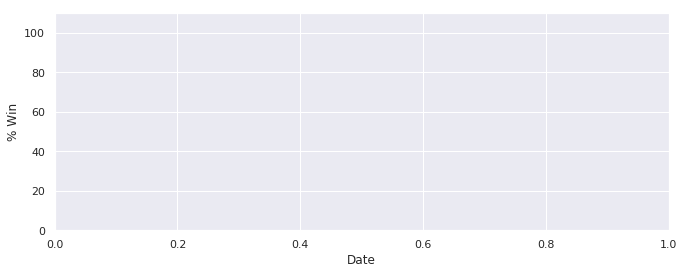

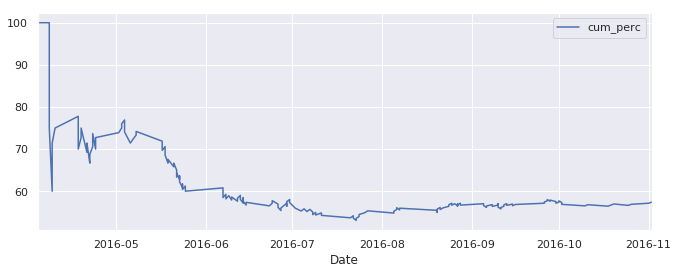

In [0]:
plt.figure()
df_CC.plot(x= 'Date',y = 'cum_perc')
plt.ylim(0,110)
plt.xlabel('Date')
plt.ylabel('% Win')

plt.show();

In [0]:
 plt.close('all')

###Q3

Which game had the most odds changes?

Hint: The Lines column contains a data frame where each row represents a change in odds.

In [0]:
%pip install surebet

In [0]:
df_lines["odds_change"]=0.

In [0]:
for row in df_lines.itertuples():
  minn = min(d for d in (df_lines.loc[row.Index][7]) if d is not None)
  maxx= max(d for d in (df_lines.loc[row.Index][7]) if d is not None)
  df_lines.at[row.Index,"odds_change"] = np.diff([minn,maxx])

In [0]:
df_lines["odds_change"].max()

2.0

In [0]:
max_index = df_lines["odds_change"].idxmax()
print(max_index)

720


In [0]:
df.loc[max_index]

GameID                          CHN201605280
EventDateTimeUTC                  1.4645e+09
EventDateTimeET                   1.4645e+09
AwayTeam               Philadelphia Phillies
HomeTeam                        Chicago Cubs
DoubleHeaderGame                           0
AwayStartingPitcher               j eickhoff
HomeStartingPicher               K HENDRICKS
FinalScoreAway                             1
FinalScoreHome                             4
HomeStartingPitcher              k hendricks
HomeTeam_encoded                           4
AwayTeam_encoded                          21
Name: 720, dtype: object

**The Philadelphia against Chicago game with ID CHN201605280 had the maximum odd change**

###Q3a


Visualize the probability of the home team winning the above game over time, by using odds.converter to convert the MoneyUs2 column to probability.

Hint: The US odds of the home team winning is contained in the column MoneyUS2 of the Lines field. This can be converted to a probability with: odds.converter::odds.us2prob(MoneyUs2).

In [0]:
#keep only the last value, containing the winning probability in the list for each column
for column in df_lines.column:
  df_lines[column] = df_lines[column].apply(lambda x: x[-1])
     

In [0]:
#Convert to gregorian calender date using the df dataframe
df_lines['Date'] = pd.to_datetime(df['EventDateTimeUTC'],unit='s').dt.date

In [0]:
df_lines.head(5)

,EnteredDateTimeET,EnteredDateTimeUTC,MoneyUS1,MoneyUS2,SpreadTeam1,SpreadUS1,SpreadUS2,TotalPoints,TotalUSOver,TotalUSUnder,final_odds,odds_change,Date
0,1.459700e+09,1.459700e+09,109,-118,1.5,-216,198,6.0,-128,116,116,0.5,2016-04-03
1,1.459700e+09,1.459700e+09,108,-117,1.5,-194,178,7.0,-123,111,111,0.0,2016-04-03
2,1.459700e+09,1.459700e+09,-116,107,-1.5,147,-160,7.5,-128,116,116,0.5,2016-04-03
3,1.459800e+09,1.459800e+09,-168,155,-1.5,-103,-105,8.0,-102,-108,-108,1.0,2016-04-04
4,1.459800e+09,1.459800e+09,105,-114,1.5,-185,170,9.0,-101,-109,-109,0.5,2016-04-04


In [0]:
#use the odds to probability converter from surebet package
df_lines["US2_Decodds"] = df_lines["MoneyUS2"].apply(lambda x : converter.us_to_dec(x))
df_lines["US1_Decodds"] = df_lines["MoneyUS1"].apply(lambda x : converter.us_to_dec(x))

In [0]:
sns.set(rc={'figure.figsize':(11, 4)})

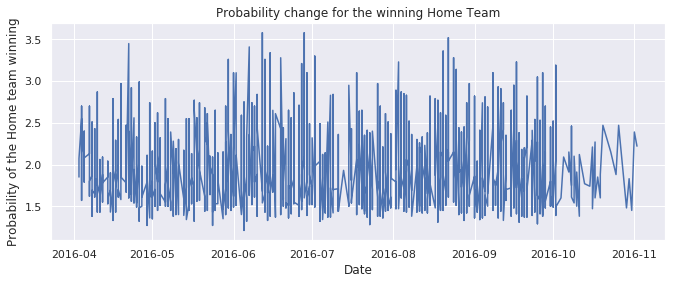

In [0]:
plt.figure()
plt.plot(df_lines["Date"],df_lines["US2_Decodds"])
plt.xlabel('Date')
plt.ylabel('Probability of the Home team winning')
plt.title("Probability change for the winning Home Team")
plt.show();

###Q4
Which starting pitcher was the largest favorite on average to win, for any pitcher with >= 10 starts?

Hint By largest favorite, we want to see which pitcher had the highest mean closing probability to win. For each game, the closing probabilities are contained in the last row in the Lines field. The MoneyUS1 and MoneyUS2 columns contain the US moneyline odds of the AwayTeam (MoneyUS1) and the HomeTeam (MoneyUS2) winning, respectively. It will help to convert these into probabilities using odds.converter.

In [0]:
#Add the pitcher names from the df dataframe to the lines dataframe
df_lines["AwayPitcher"] = df["AwayStartingPitcher"]
df_lines["HomePitcher"] = df["HomeStartingPitcher"]

In [0]:
type(df_lines["US1_Decodds"][0])

decimal.Decimal

In [0]:
#convert the decimal types to numeric
df_lines["US2_Decodds"] = pd.to_numeric(df_lines["US2_Decodds"])
df_lines["US1_Decodds"] = pd.to_numeric(df_lines["US1_Decodds"])

In [0]:
#work with only the necessary columns
df_meanProb = df_lines.drop(["SpreadTeam1","MoneyUS1","MoneyUS2","EnteredDateTimeET","EnteredDateTimeUTC","SpreadUS1","SpreadUS2","TotalPoints","TotalUSOver","TotalUSUnder"],axis=1)

In [0]:
df_meanProb.head()

,AwayPitcher,HomePitcher,US2_Decodds,US1_Decodds
0,a wainwright,f liriano,1.85,2.09
1,m stroman,c archer,1.85,2.08
2,m harvey,e volquez,2.07,1.86
3,m bumgarner,w peralta,2.55,1.60
4,e santana,c tillman,1.88,2.05


In [0]:
#split into 2 df
df_prob = df_meanProb[["AwayPitcher","US1_Decodds"]].copy()
df_probH = df_meanProb[["HomePitcher","US2_Decodds"]].copy()

In [0]:
#rename columns to concatanate
df_prob.columns = ["Pitcher","Odds"]
df_probH.columns = ["Pitcher","Odds"]

In [0]:
(df_prob.groupby("Pitcher").mean()).sort_values("Odds",ascending=False)

,Odds
Pitcher,
c bergman,3.740000
e escobar,3.540000
j smith,3.460000
m koch,3.280000
b mitchell,3.065000
p dean,3.057500
a blair,3.051429
r stephenson,3.023333
z eflin,3.022857


The probability of the home team winning actually decreases as time goes on. 